### Librerias

In [441]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [442]:
# Configurar la visualización de gráficos inline
%matplotlib inline

## Datos

### importacion de CSV

In [443]:
data = pd.read_csv('../datos/procesados/data_EDA.csv')

In [444]:
data.sample(7, random_state = 5)

,Unnamed: 0,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
326,326,AD,78.6,Male,20,Not Hisp/Latino,White,0,21,True,"3,3",AD
356,356,LMCI,73.5,Male,16,Not Hisp/Latino,White,0,30,True,"3,3",MCI
84,84,CN,74.1,Male,17,Not Hisp/Latino,White,0,30,True,"3,3",CN
623,623,LMCI,74.4,Female,12,Not Hisp/Latino,White,1,29,True,"3,4",MCI
473,473,LMCI,69.0,Female,8,Not Hisp/Latino,White,1,26,True,"3,4",MCI
99,99,CN,78.3,Female,14,Not Hisp/Latino,White,1,29,True,"3,4",CN
419,419,CN,83.1,Male,14,Not Hisp/Latino,White,0,30,True,"3,3",CN


In [445]:
data.drop('Unnamed: 0', axis=1, inplace=True)

### Cantidad de variables por tipo de datos

In [446]:
data.dtypes.value_counts()

object     7
int64      3
float64    1
Name: count, dtype: int64

In [447]:
data.dtypes

DX                   object
AGE                 float64
PTGENDER             object
PTEDUCAT              int64
PTETHCAT             object
PTRACCAT             object
APOE4                 int64
MMSE                  int64
imputed_genotype     object
APOE Genotype        object
DX_SUB               object
dtype: object

In [448]:
data.sample(4, random_state=3)

,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
578,LMCI,76.2,Male,16,Not Hisp/Latino,White,0,26,True,"3,3",MCI
454,LMCI,72.3,Male,17,Not Hisp/Latino,White,0,30,True,"3,3",MCI
131,LMCI,79.4,Male,16,Not Hisp/Latino,White,1,30,True,"3,4",MCI
359,LMCI,74.0,Male,12,Not Hisp/Latino,White,2,29,True,"4,4",MCI


### Conversion de tipos de datos de las columnas

In [449]:
#Conversion de columnas tipo objeto con menos de 30 variables
data[['DX', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'imputed_genotype','DX_SUB']] = data[['DX', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'imputed_genotype','DX_SUB']].astype("category")

### Codificación

In [450]:
datos_codificados = pd.DataFrame(data)
#categoricos nominales
# Seleccionar las columnas de tipo object
columnas_nominales =['DX', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'imputed_genotype','DX_SUB']

# Iterar sobre las columnas seleccionadas y aplicar la codificación
for column in columnas_nominales:
    encoder = LabelEncoder()
    datos_codificados[column] = encoder.fit_transform(datos_codificados[column])

#Se ordenan por edad
datos_codificados = datos_codificados.sort_values(by="AGE", ascending=False)

In [451]:
#categoricos ordinales
#Codificamos los datos 'APEO Genotype' de string a float

datos_codificados["APOE Genotype"] = [float(str(i).replace(",", ".")) for i in data["APOE Genotype"]]



In [452]:
datos_codificados.head()

,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
310,1,89.6,0,16,1,2,0,30,1,3.4,1
90,2,89.3,1,13,1,2,0,26,1,3.3,2
138,0,89.1,0,20,1,2,0,26,1,3.3,0
205,2,88.8,1,11,1,2,0,26,1,3.3,2
407,1,88.6,0,20,1,2,0,30,0,3.4,1


In [453]:
datos_codificados.dtypes

DX                    int64
AGE                 float64
PTGENDER              int64
PTEDUCAT              int64
PTETHCAT              int64
PTRACCAT              int64
APOE4                 int64
MMSE                  int64
imputed_genotype      int64
APOE Genotype       float64
DX_SUB                int64
dtype: object

### Escalamiento

In [454]:
# Primero, importamos la clase MinMaxScaler del módulo adecuado.
from sklearn.preprocessing import MinMaxScaler

# Ahora, creamos una instancia del escalador MinMaxScaler.
scaler = MinMaxScaler()

# Luego, copiamos nuestros datos codificados para mantener una versión sin cambios.
datos_escalados = datos_codificados.copy()

# A continuación, aplicamos el escalador a nuestros datos codificados utilizando el método fit_transform.
# Esto nos permite escalar selectivamente nuestras características dentro de un rango específico.
datos_escalados = scaler.fit_transform(datos_codificados)

# En este punto, nuestros datos están escalados y listos para su posterior análisis.

In [455]:
# Creamos un DataFrame a partir de los datos escalados utilizando pandas.
# Esto nos permite mantener la estructura de datos y los nombres de las columnas.
datos_escalados = pd.DataFrame(datos_escalados, columns=datos_codificados.columns)

In [456]:
datos_escalados

,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
0,0.5,1.000000,0.0,0.714286,0.5,1.0,0.0,1.0,0.5,0.545455,0.5
1,1.0,0.991304,1.0,0.500000,0.5,1.0,0.0,0.6,0.5,0.500000,1.0
2,0.0,0.985507,0.0,1.000000,0.5,1.0,0.0,0.6,0.5,0.500000,0.0
3,1.0,0.976812,1.0,0.357143,0.5,1.0,0.0,0.6,0.5,0.500000,1.0
4,0.5,0.971014,0.0,1.000000,0.5,1.0,0.0,1.0,0.0,0.545455,0.5
...,...,...,...,...,...,...,...,...,...,...,...
623,0.0,0.037681,1.0,0.714286,0.5,1.0,1.0,0.3,0.5,0.545455,0.0
624,1.0,0.031884,0.0,0.857143,0.0,1.0,0.0,0.4,0.0,0.545455,1.0
625,1.0,0.002899,0.0,0.857143,0.5,1.0,0.0,0.5,0.5,0.500000,1.0
626,0.0,0.000000,0.0,0.857143,0.5,1.0,0.0,0.4,0.0,0.500000,0.0


### Proporcion entre variables categoricas

In [457]:
# Muestreamos aleatoriamente 3 filas de nuestro DataFrame "data".
# Usamos el argumento "random_state" con el valor 3 para asegurar reproducibilidad de los resultados.
data.sample(3, random_state=3)


,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
578,LMCI,76.2,Male,16,Not Hisp/Latino,White,0,26,True,"3,3",MCI
454,LMCI,72.3,Male,17,Not Hisp/Latino,White,0,30,True,"3,3",MCI
131,LMCI,79.4,Male,16,Not Hisp/Latino,White,1,30,True,"3,4",MCI


In [458]:
# En esta sección, estamos realizando dos operaciones en la columna 'APOE Genotype'.

# Primero, reemplazamos las comas (',') por puntos ('.') en la columna 'APOE Genotype'.
data['APOE Genotype'] = data['APOE Genotype'].str.replace(',', '.')

# Luego, convertimos los valores en la columna 'APOE Genotype' a tipo de datos float (números decimales).
data['APOE Genotype'] = data['APOE Genotype'].astype(float)


In [459]:
# Realizamos la discretización de columnas en el DataFrame 'data' y almacenamos los resultados en 'datos_discretizados'.
datos_discretizados = data.copy()

# Luego, generamos estadísticas descriptivas sobre los datos discretizados.
# Esto nos proporcionará información resumida sobre las columnas después de la discretización.
datos_discretizados.describe()


,AGE,PTEDUCAT,APOE4,MMSE,APOE Genotype
count,628.000000,628.000000,628.000000,628.000000,628.000000
mean,75.169586,15.616242,0.598726,26.920382,3.365764
std,6.687429,2.977993,0.683456,2.562152,0.478158
min,55.100000,6.000000,0.000000,20.000000,2.200000
25%,71.200000,13.000000,0.000000,25.000000,3.300000
50%,75.450000,16.000000,0.000000,27.000000,3.300000
75%,80.000000,18.000000,1.000000,29.000000,3.400000
max,89.600000,20.000000,2.000000,30.000000,4.400000


In [460]:
# Definimos las columnas que queremos discretizar junto con sus parámetros.
columnas_para_discretizar = [
    {'columna': 'AGE', 'paso': 3.5},
    {'columna': 'PTEDUCAT', 'paso': 1.4},
    {'columna': 'APOE4', 'paso': 0.2},
    {'columna': 'MMSE', 'paso': 1},
    {'columna': 'APOE Genotype', 'paso': 0.2}
]

# Iteramos sobre las columnas y aplicamos la discretización.
for config in columnas_para_discretizar:
    columna = config['columna']
    paso = config['paso']
    
    # Definimos los límites de los rangos.
    bins = np.arange(datos_discretizados[columna].min(), datos_discretizados[columna].max() + paso, paso)
    
    # Definimos las etiquetas para cada rango (una menos que los bordes).
    labels = [f'{round(i, 2)}-{round((i + paso), 2)}' for i in bins[:-1]]
    
    # Utilizamos la función cut para discretizar la columna y creamos una nueva columna con los valores discretizados.
    datos_discretizados[f'{columna}_discretizada'] = pd.cut(datos_discretizados[columna], bins=bins, labels=labels)
    
    # Eliminamos la columna original después de la discretización.
    datos_discretizados.drop(columna, axis=1, inplace=True)


In [461]:
# Obtenemos las columnas del DataFrame 'datos_discretizados'.
columnas = datos_discretizados.columns

# Iteramos sobre cada columna y cambiamos su tipo de dato a 'category'.
for col in columnas:
    datos_discretizados[col] = datos_discretizados[col].astype('category')


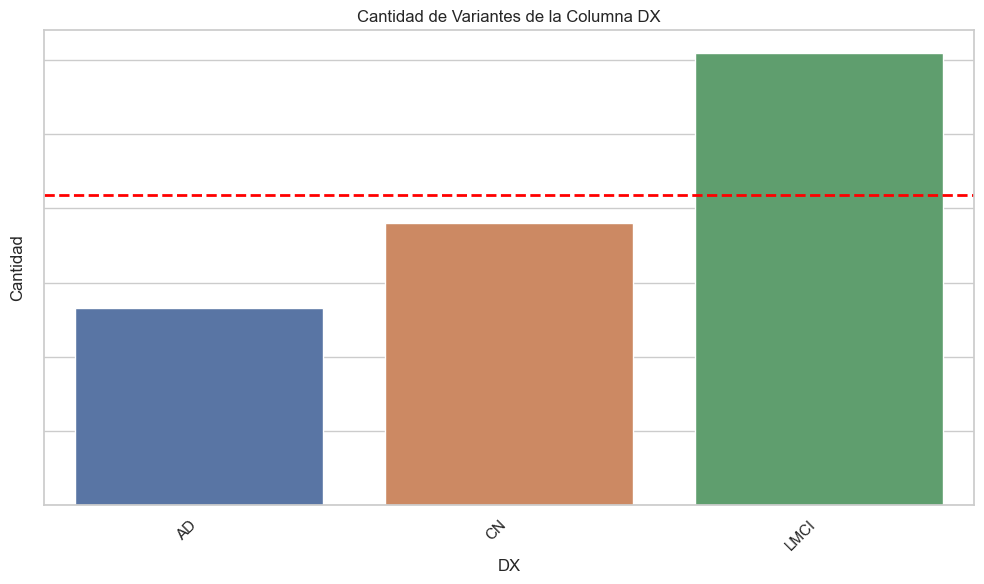

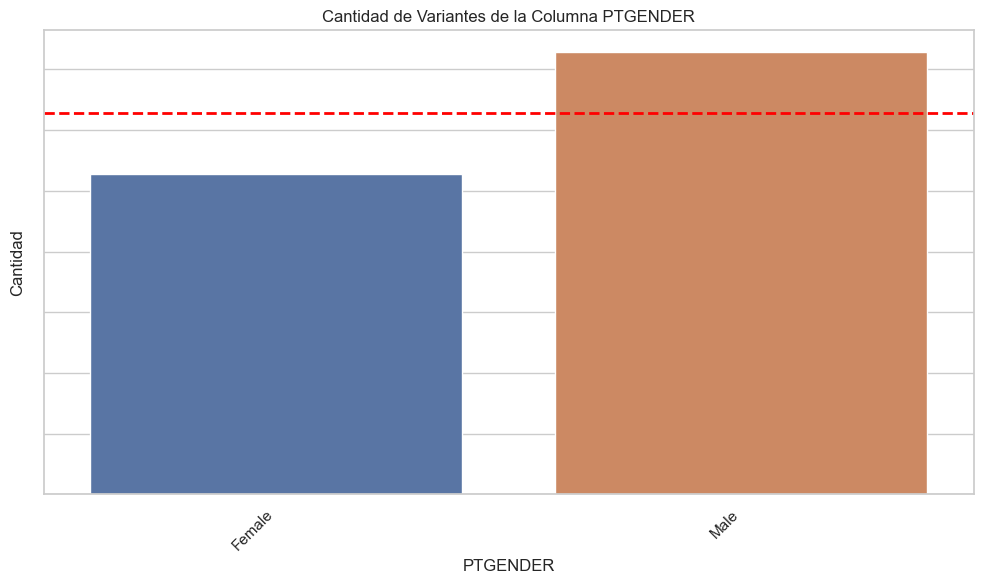

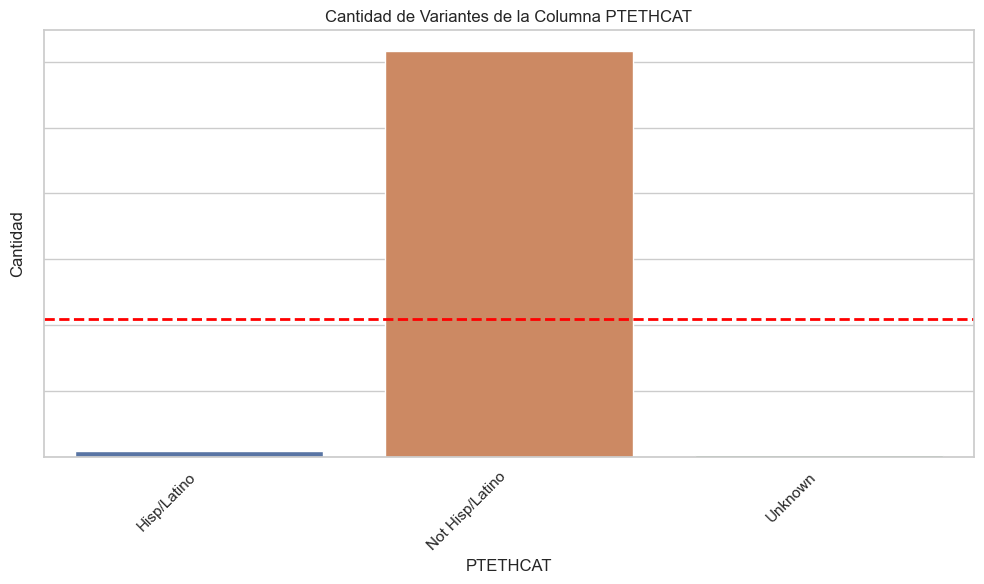

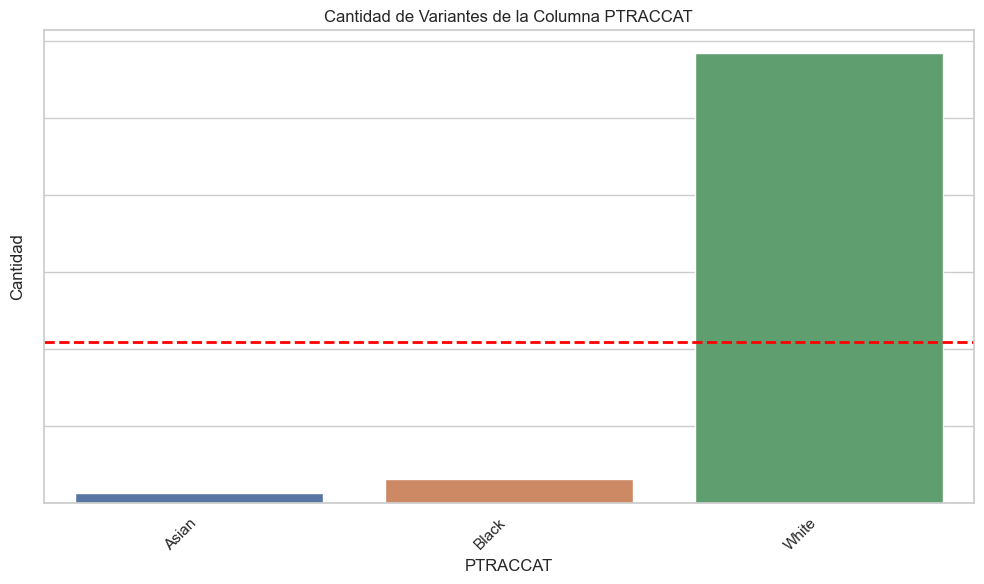

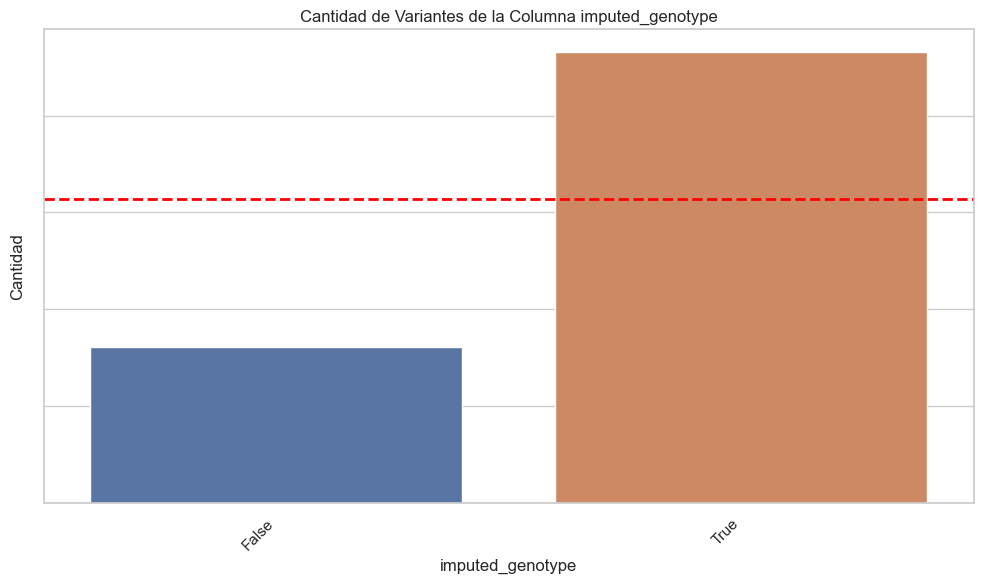

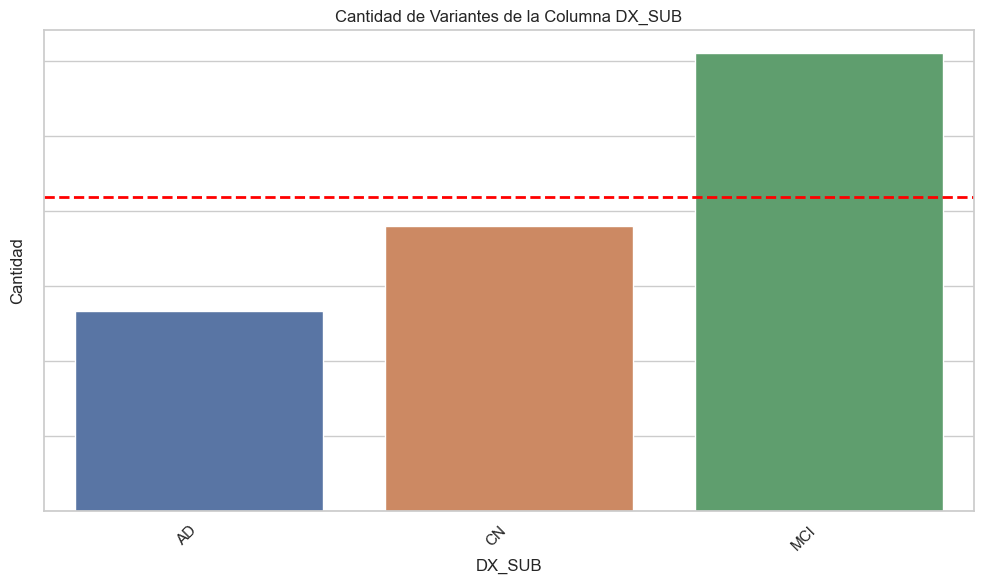

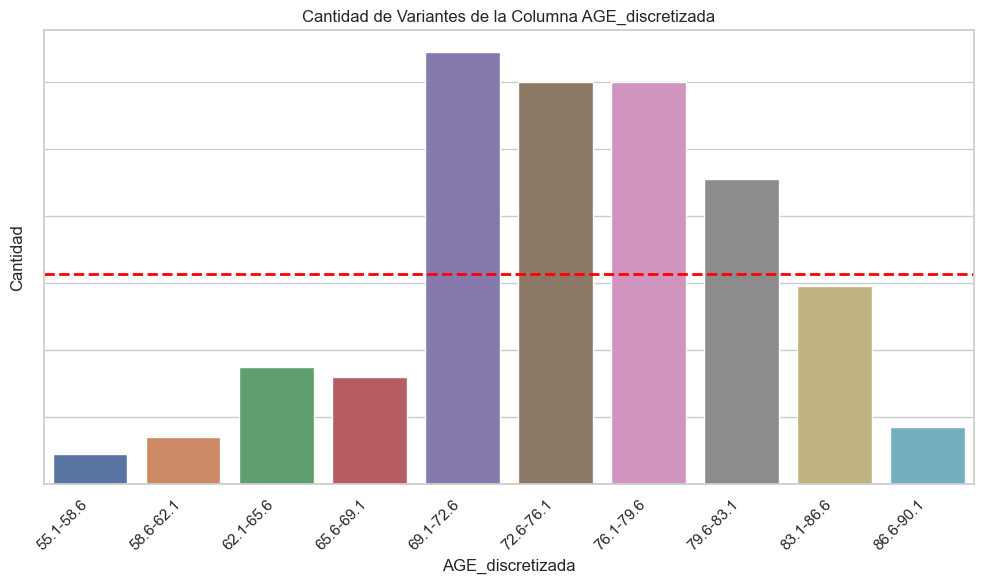

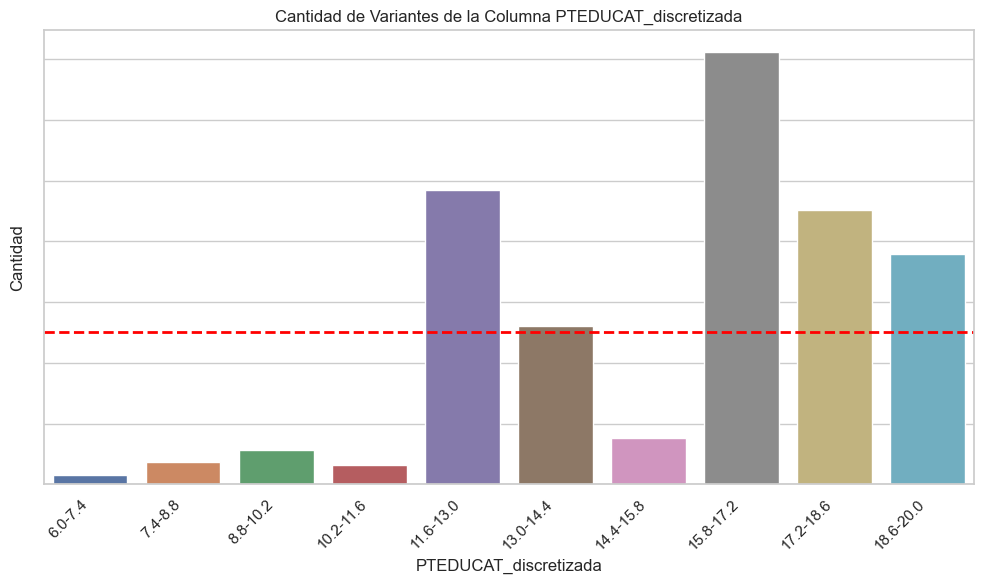

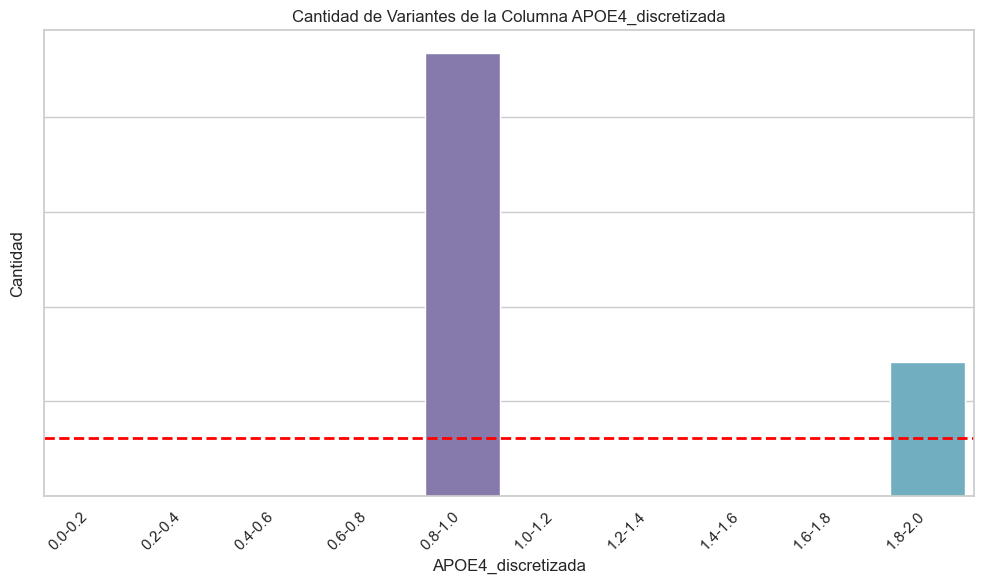

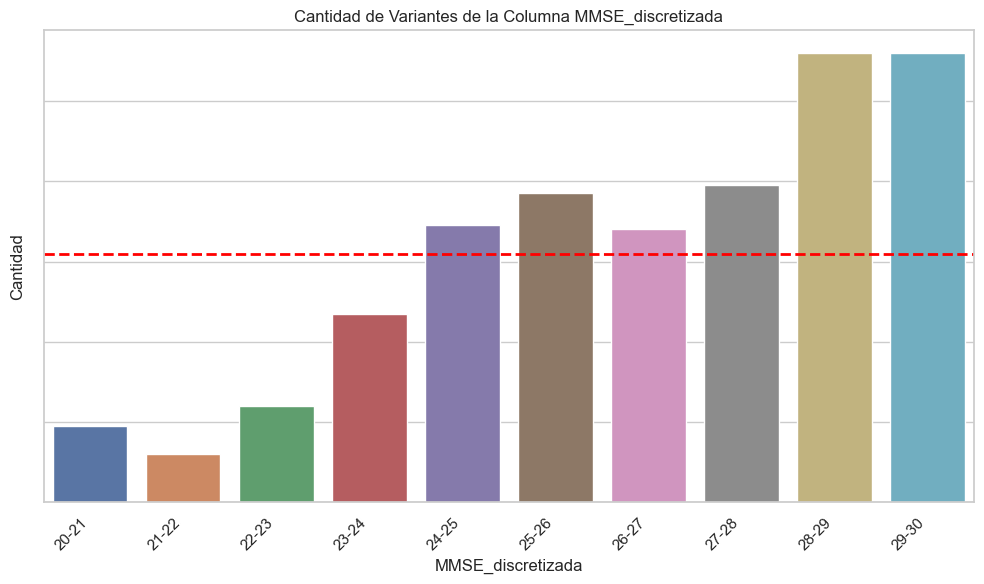

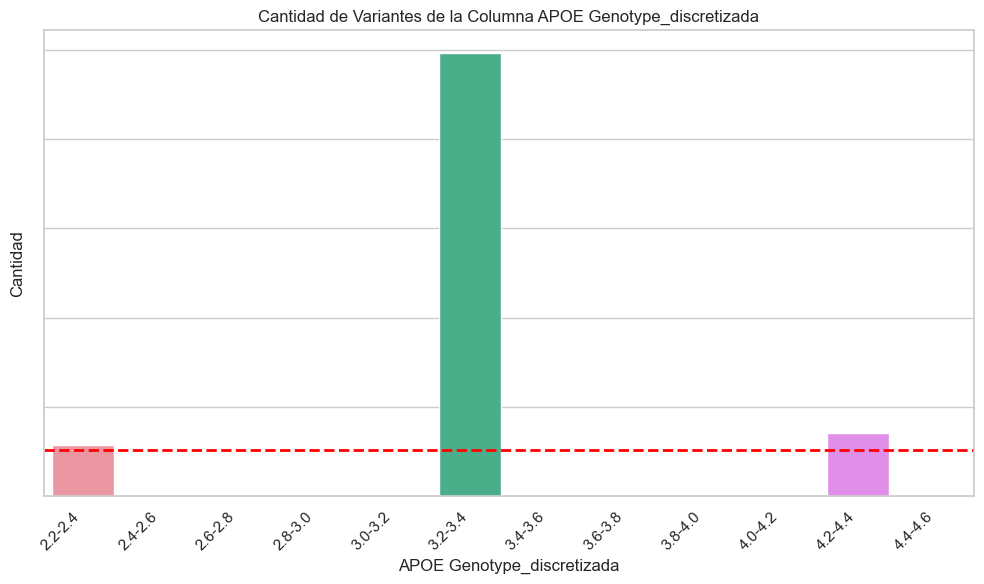

In [462]:
# Iteramos sobre cada columna en el DataFrame 'datos_discretizados' para visualizar la cantidad de variantes.

for columna in datos_discretizados.columns:
    # Configuramos el estilo del gráfico
    sns.set(style='whitegrid')
    plt.figure(figsize=(10, 6))
    
    # Contamos las variantes de la columna categórica
    variant_counts = datos_discretizados[columna].value_counts()

    # Creamos el gráfico de barras
    ax = sns.barplot(x=variant_counts.index, y=variant_counts.values)

    # Configuramos el título del gráfico
    plt.title(f'Cantidad de Variantes de la Columna {columna}')
    plt.xlabel(columna)
    plt.ylabel('Cantidad')
    
    # Agregamos una línea roja en la media de los datos
    valor_media = variant_counts.values.mean()
    ax.axhline(valor_media, color='red', linestyle='dashed', linewidth=2)

    # Ajustamos las etiquetas del eje x para que sean legibles
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Quitamos las etiquetas del eje y para una mejor visualización
    ax.set_yticklabels([])

    # Ajustamos el diseño del gráfico para que se vea bien
    plt.tight_layout()
    
    # Mostramos el gráfico
    plt.show()


### Estadisticas generales

In [463]:
# Generamos estadísticas descriptivas para diferentes tipos de columnas en el DataFrame 'data'.

# Incluimos las columnas de tipo 'category', 'object', 'int64' y 'float64' en las estadísticas.
data.describe(include=['category', 'object', 'int64', 'float64'])

,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
count,628,628.000000,628,628.000000,628,628,628.000000,628.000000,627,628.000000,628
unique,3,NaN,2,NaN,3,3,NaN,NaN,2,NaN,3
top,LMCI,NaN,Male,NaN,Not Hisp/Latino,White,NaN,NaN,True,NaN,MCI
freq,305,NaN,364,NaN,617,584,NaN,NaN,466,NaN,305
mean,NaN,75.169586,NaN,15.616242,NaN,NaN,0.598726,26.920382,NaN,3.365764,NaN
std,NaN,6.687429,NaN,2.977993,NaN,NaN,0.683456,2.562152,NaN,0.478158,NaN
min,NaN,55.100000,NaN,6.000000,NaN,NaN,0.000000,20.000000,NaN,2.200000,NaN
25%,NaN,71.200000,NaN,13.000000,NaN,NaN,0.000000,25.000000,NaN,3.300000,NaN
50%,NaN,75.450000,NaN,16.000000,NaN,NaN,0.000000,27.000000,NaN,3.300000,NaN
75%,NaN,80.000000,NaN,18.000000,NaN,NaN,1.000000,29.000000,NaN,3.400000,NaN


### Correlaciones lineales

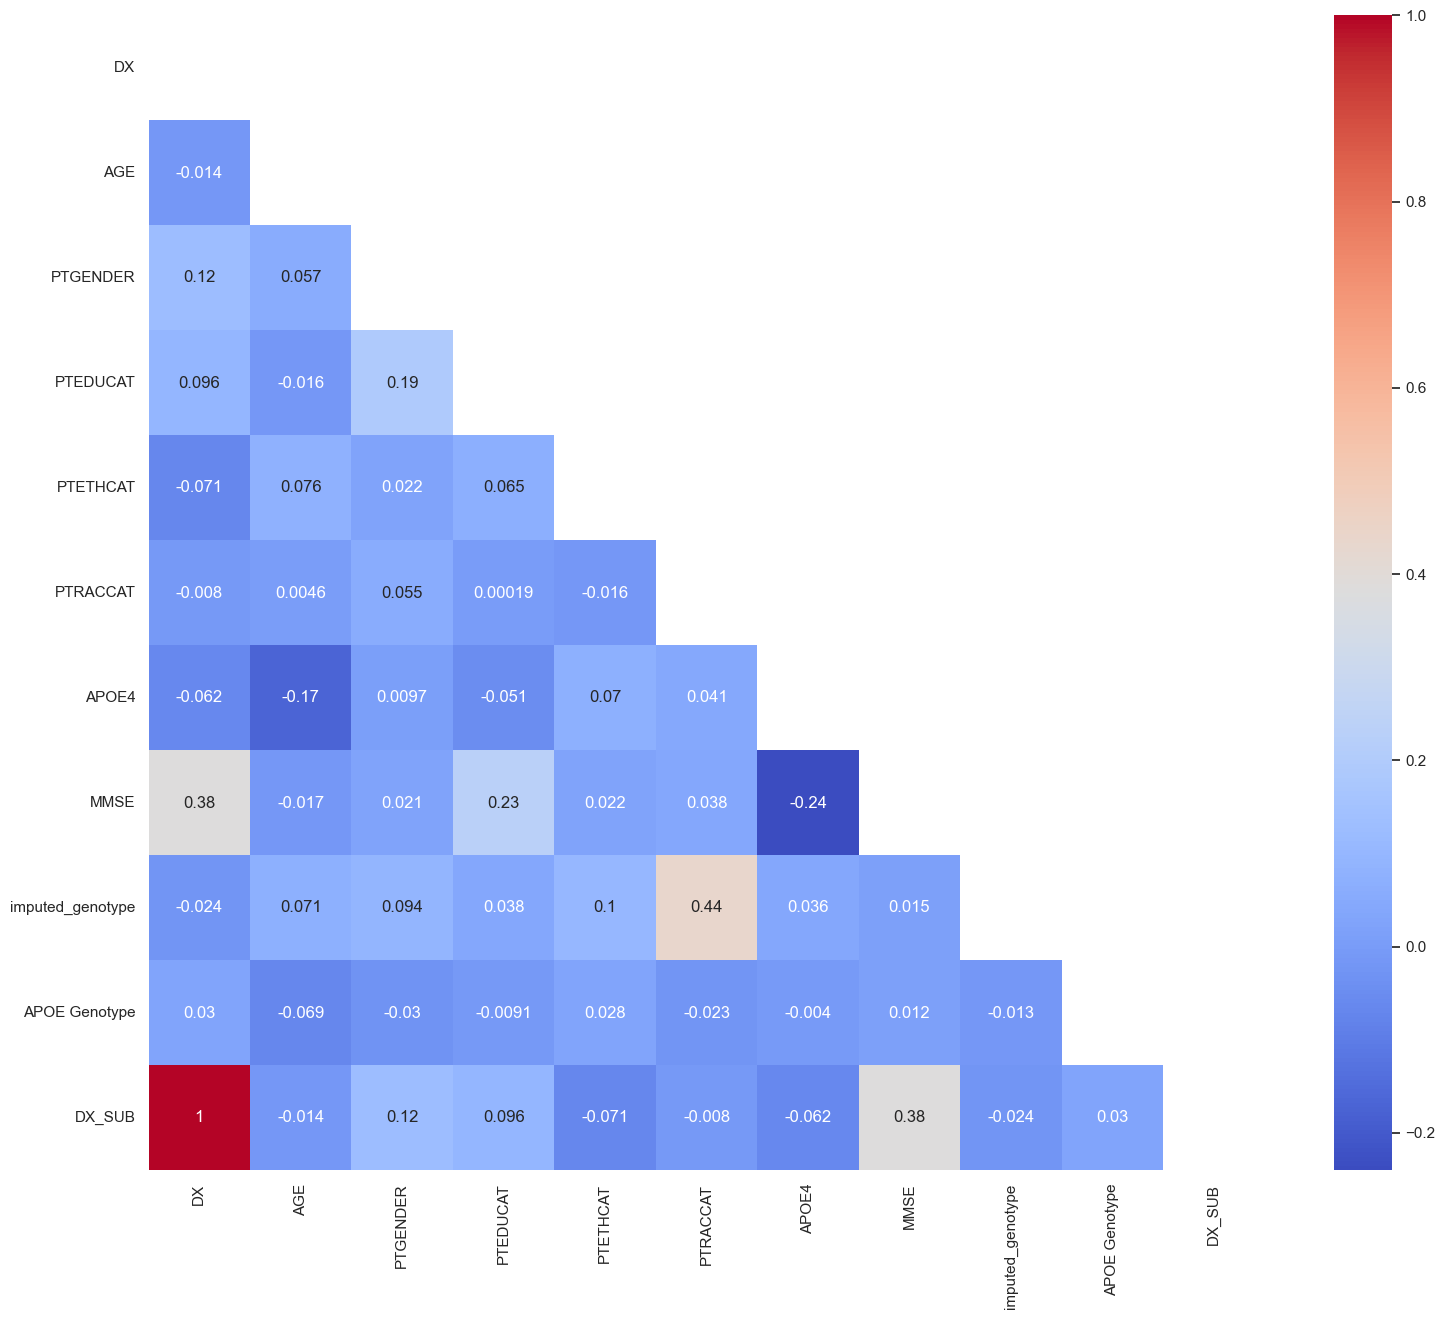

In [464]:
# Calculamos la matriz de correlación de los datos escalados.
matriz_correlacion_data = datos_escalados.corr()

# Creamos una máscara triangular superior para ocultar la mitad de la matriz que es redundante.
mask = np.triu(np.ones_like(matriz_correlacion_data, dtype=bool))

# Creamos un mapa de calor para visualizar la matriz de correlación.
plt.figure(figsize=(18, 15))
sns.heatmap(matriz_correlacion_data, mask=mask, annot=True, cmap='coolwarm')

# Mostramos el mapa de calor.
plt.show()


#### Pares superiores al +/- 40%

In [465]:
# Definimos el umbral de correlación (35% o -35% en valor absoluto).
umbral = 0.35

# Encontramos las correlaciones que cumplen con el umbral y las almacenamos en una lista de tuplas.
correlaciones_cumplen = [
    (col1, col2, valor)
    for col1 in matriz_correlacion_data.columns
    for col2, valor in matriz_correlacion_data[col1].items()
    if (col1 != col2) and abs(valor) >= umbral and not np.isnan(valor)
]

# Creamos un conjunto para almacenar tuplas únicas y una lista para las tuplas únicas resultantes.
tuplas_unicas = set()
tuplas_resultantes = []

# Iteramos sobre las tuplas de correlaciones que cumplen con el umbral.
for tupla in correlaciones_cumplen:
    # Ordenamos las columnas alfabéticamente para que no importe el orden.
    tupla_ordenada = tuple(sorted(tupla[:2])) + (tupla[2],)
    
    # Verificamos si la tupla ordenada ya está en el conjunto de tuplas únicas.
    if tupla_ordenada not in tuplas_unicas:
        # Agregamos la tupla al conjunto de tuplas únicas y a la lista de resultados.
        tuplas_unicas.add(tupla_ordenada)
        tuplas_resultantes.append(tupla)

# 'tuplas_resultantes' ahora contiene las tuplas únicas sin duplicados de columnas invertidas con la misma correlación.


In [466]:
# Creamos el gráfico de barras para mostrar correlaciones superiores al umbral especificado
pares_columnas = [f'{col1} - {col2}' for col1, col2, correlacion in tuplas_resultantes]
valores_correlacion = [correlacion for col1, col2, correlacion in tuplas_resultantes]

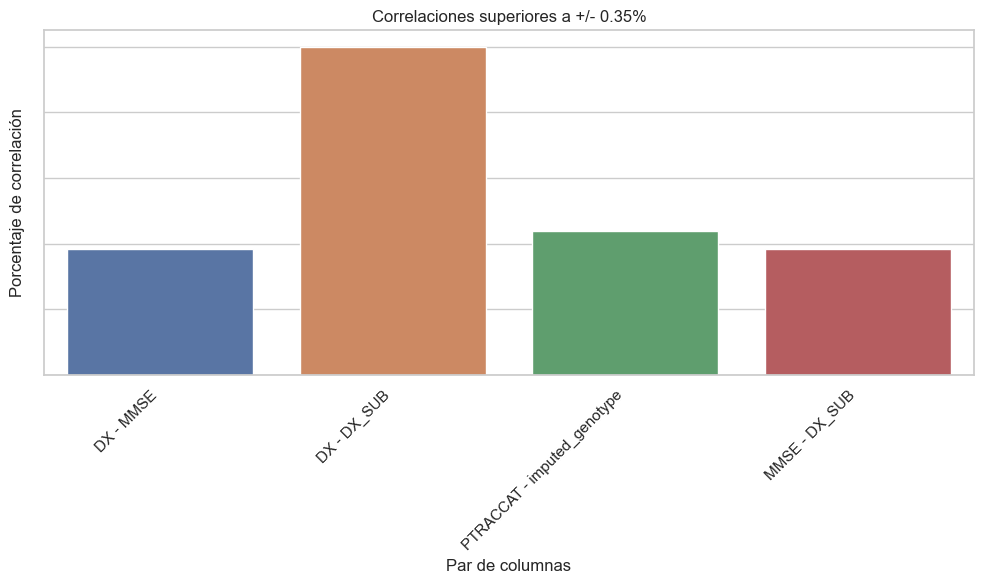

In [467]:
# Configuramos el estilo del gráfico
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=pares_columnas, y=valores_correlacion)

# Configuramos el título del gráfico
plt.title(f'Correlaciones superiores a +/- {umbral}%')
plt.xlabel('Par de columnas')
plt.ylabel('Porcentaje de correlación')

# Ajustamos las etiquetas del eje x para que sean legibles
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Quitamos las etiquetas del eje y para una mejor visualización
ax.set_yticklabels([])

# Ajustamos el diseño del gráfico para una mejor presentación
plt.tight_layout()

# Mostramos el gráfico
plt.show()


### Guardado de CSV

In [468]:
# Guardamos el DataFrame 'datos_codificados' en un archivo CSV
datos_codificados.to_csv('../datos/procesados/datos_codificados.csv', index=True)
# Se utiliza 'index=True' para incluir los índices en el archivo CSV

# Guardamos el DataFrame 'datos_discretizados' en un archivo CSV
datos_discretizados.to_csv('../datos/procesados/datos_discretizados.csv', index=True)

# Guardamos el DataFrame 'datos_escalados' en un archivo CSV
datos_escalados.to_csv('../datos/procesados/datos_escalados.csv', index=True)
